In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

# Exploratory Data Analysis (EDA)

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_train.shape

(891, 12)

In [6]:
#891 rows and 12 columns
#i.e 891 unique passengers

In [7]:
#number of passengers survived
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
# 342 survived out of 891

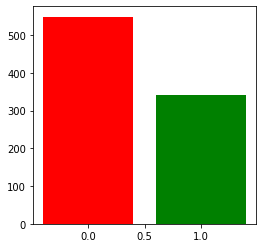

In [22]:
#bargraph plot

plt.figure(figsize=(4,4))
plt.bar(list(titanic_train["Survived"].value_counts().keys()), list(titanic_train["Survived"].value_counts()), color=["r","g"])
plt.show()

In [15]:
#number of passengers in different class
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
# 491 passengers in third class, 216 in first, 184 in second

<BarContainer object of 3 artists>

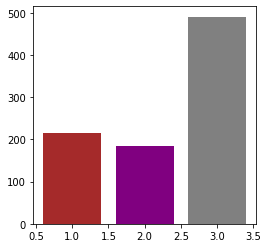

In [23]:
plt.figure(figsize=(4,4))
plt.bar(list(titanic_train["Pclass"].value_counts().keys()), list(titanic_train["Pclass"].value_counts()), color=["gray","brown","purple"])

In [24]:
#number of male and female

titanic_train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<BarContainer object of 2 artists>

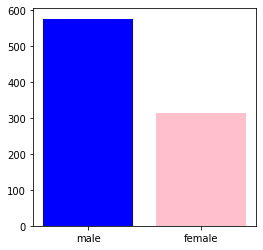

In [25]:
plt.figure(figsize=(4,4))
plt.bar(list(titanic_train["Sex"].value_counts().keys()), list(titanic_train["Sex"].value_counts()), color=["blue","pink"])

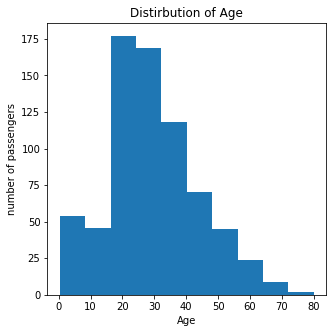

In [28]:
#bar plot is used when working with categorical data
#histogram is used when working with numerical data
# here column 'Age' is numerical data

plt.figure(figsize=(5,5))
plt.hist(titanic_train['Age'])
plt.title("Distirbution of Age")
plt.xlabel("Age")
plt.ylabel("number of passengers")
plt.show()


# Building Model

In [35]:
'''
building model based on : 
dependent variable is survived column 
and
independent variable is age column
''' 
# on the basis of age, whether the passenger will survive or not

'\nbuilding model based on : \ndependent variable is survived column \nand\nindependent variable is age column\n'

In [31]:
# checking for null values 
sum(titanic_train['Survived'].isnull())

0

In [36]:
sum(titanic_train["Age"].isnull())

177

In [37]:
#dropping the null values instead of imputing the values
titanic_train = titanic_train.dropna()

In [38]:
sum(titanic_train["Age"].isnull())

0

In [39]:
x_train = titanic_train[['Age']]
y_train = titanic_train[['Survived']]

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
# creating object of DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [43]:
#building model on top of the training set
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
#predicting values on top of the test set

In [45]:
sum(titanic_test['Age'].isnull())

86

In [46]:
titanic_test = titanic_test.dropna()

In [47]:
sum(titanic_test['Age'].isnull())

0

In [59]:
sum(titanic_test['Age'].value_counts())

87

In [48]:
#extracting 'Age' column from the test set and  storing on variable 'x_test'
x_test = titanic_test[['Age']]

In [49]:
y_pred = dtc.predict(x_test)

In [50]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
      dtype=int64)

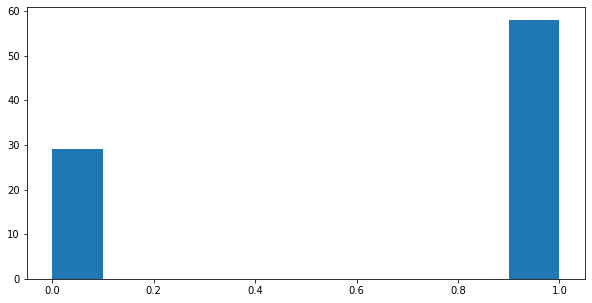

In [53]:
plt.figure(figsize=(10,5))
plt.hist(y_pred)
plt.show()
